In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skopt import Optimizer
from skopt.space import Real
from skopt.plots import plot_gaussian_process


In [30]:
def f_1(x):
    return np.sin(5*x)*(1-np.tanh(x**2))


def f_2(x):
    return x**2 - 10*np.cos(5*x)

bounds_f1 = (-2, 2)
bounds_f2 = (-10, 10)


In [35]:
class OptimizerWrapper:
    def __init__(self, func, bounds, n_initial_points=10, n_iterations=30, acq_func="EI", kappa=1.96):
       
        self.func = func
        self.bounds = bounds
        self.n_initial_points = n_initial_points
        self.n_iterations = n_iterations
        self.acq_func = acq_func
        self.kappa = kappa

        # Definition Dimension
        self.dimensions = [Real(bounds[0], bounds[1], name='x')]  #Nutze Scipy-Klasse

        # Initialisierung des Optimizers
        acq_func_kwargs = {'kappa': kappa} if acq_func == "LCB" else {}
        self.optimizer = Optimizer(
            dimensions=self.dimensions,
            base_estimator="GP",
            acq_func=acq_func,
            acq_func_kwargs=acq_func_kwargs,
            n_initial_points=self.n_initial_points,
            initial_point_generator="lhs"
        )

    def optimize(self):
        for i in range(self.n_iterations):
            x = self.optimizer.ask()
            y = self.func(x[0])
            self.optimizer.tell(x, y)
            if i in [9, 19, 29]:
                if i < len(self.optimizer.yi):  #Muss mindest Anzahl an Iterationen haben, damit Plot gebildet wird
                    self.plot_optimizer(i+1)
    

        best_x = self.optimizer.Xi[np.argmin(self.optimizer.yi)]
        best_y = np.min(self.optimizer.yi)
        return best_x, best_y

    def plot_optimizer(self, iteration):
        plt.figure()
        plot_gaussian_process(
            self.optimizer.get_result(),
            objective=self.func,
            n_calls=iteration,
            show_next_point=True,
            show_acq_func=True
        )
        plt.title(f'{self.acq_func} Optimization after {iteration} Iterations')
        plt.show()

IndexError: list index out of range

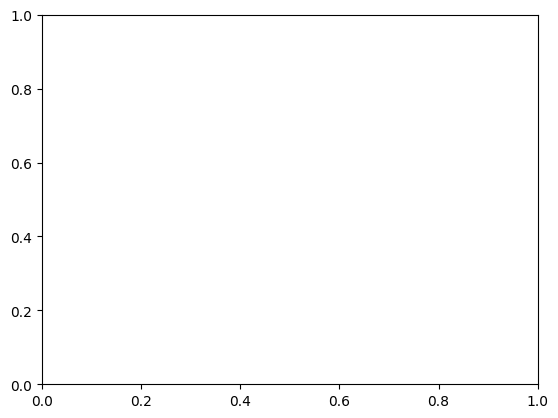

In [36]:
def run_optimization(func, bounds, acq_func, kappa=1.96):
    optimizer = OptimizerWrapper(func, bounds, n_iterations=30, acq_func=acq_func, kappa=kappa)
    best_x, best_y = optimizer.optimize()
    print(f"Beste Lösung für {func.__name__} mit {acq_func} (kappa={kappa}): x = {best_x}, f(x) = {best_y}")

# Durchführung der Optimierungen und Generierung der Plots
run_optimization(f_1, bounds_f1, "EI")
run_optimization(f_1, bounds_f1, "LCB", kappa=1.96)
run_optimization(f_2, bounds_f2, "EI")
run_optimization(f_2, bounds_f2, "LCB", kappa=1.96)

In [19]:
'Expected Improvement (EI)'
optimizer_f1_ei = OptimizerWrapper(func=f_1, bounds=bounds_f1, acq_func="EI")
best_x_f1_ei, best_y_f1_ei = optimizer_f1_ei.optimize()
print("Beste Lösung für f1 mit EI: x =", best_x_f1_ei, ", f1(x) =", best_y_f1_ei)

optimizer_f2_ei = OptimizerWrapper(func=f_2, bounds=bounds_f2, acq_func="EI")
best_x_f2_ei, best_y_f2_ei = optimizer_f2_ei.optimize()
print("Beste Lösung für f2 mit EI: x =", best_x_f2_ei, ", f2(x) =", best_y_f2_ei)


Beste Lösung für f1 mit EI: x = [-0.28918707635714336] , f1(x) = -0.9094297881717119
Beste Lösung für f2 mit EI: x = [0.0021491965853730477] , f2(x) = -9.999418005764836


In [24]:
'Lower Confidence Bounce (LCB)'
kappa_f1_lcb = 1.96 #0.1 , 1.96 , 10
optimizer_f1_lcb = OptimizerWrapper(func=f_1, bounds=bounds_f1, acq_func="LCB", kappa=kappa_f1_lcb) #kappa=0.1 , 1.96 , 10
best_x_f1_lcb, best_y_f1_lcb = optimizer_f1_lcb.optimize()
print(f"Beste Lösung für f1 mit LCB (kappa={kappa_f1_lcb}): x =", best_x_f1_lcb, ", f1(x) =", best_y_f1_lcb)


kappa_f2_lcb = 1.96 #0.1 , 1.96 , 10
optimizer_f2_lcb = OptimizerWrapper(func=f_2, bounds=bounds_f2, acq_func="LCB", kappa=kappa_f2_lcb)
best_x_f2_lcb, best_y_f2_lcb = optimizer_f2_lcb.optimize()
print(f"Beste Lösung für f2 mit LCB (kappa={kappa_f2_lcb}): x =", best_x_f2_lcb, ", f1(x) =", best_y_f2_lcb)

Beste Lösung für f1 mit LCB (kappa=1.96): x = [-0.2891972676152803] , f1(x) = -0.9094297955553221
Beste Lösung für f2 mit LCB (kappa=1.96): x = [0.02121367376755856] , f1(x) = -9.943350204983675
